In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/FINAL.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     119143 non-null  int64  
 1   customer_city                  119143 non-null  object 
 2   seller_city                    118310 non-null  object 
 3   seller_state                   118310 non-null  object 
 4   product_category_name_english  116576 non-null  object 
 5   price                          118310 non-null  float64
 6   payment_value                  119140 non-null  float64
 7   payment_type                   119140 non-null  object 
 8   order_status                   119143 non-null  object 
 9   order_purchase_timestamp       119143 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  review_score                   118146 non-null  float64
 12  review_comment_title          

What is the effect of review length on customer sentiment and review scores in Brazilian e-commerce, and how can this relationship inform strategies to encourage more informative customer feedback?

In [3]:
df.describe()

,Unnamed: 0,price,payment_value,review_score
count,119143.000000,118310.000000,119140.000000,118146.000000
mean,59571.000000,120.646603,172.735135,4.015582
std,34393.765898,184.109691,267.776077,1.400436
min,0.000000,0.850000,0.000000,1.000000
25%,29785.500000,39.900000,60.850000,4.000000
50%,59571.000000,74.900000,108.160000,5.000000
75%,89356.500000,134.900000,189.240000,5.000000
max,119142.000000,6735.000000,13664.080000,5.000000


In [4]:
df.head()

,Unnamed: 0,customer_city,seller_city,seller_state,product_category_name_english,price,payment_value,payment_type,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,review_comment_title,review_comment_message,review_creation_date
0,0,sao paulo,maua,SP,housewares,29.99,18.12,credit_card,delivered,10/2/2017 10:56,10/10/2017 21:25,4.0,NaN,"I haven't tested the product yet, but it came ...",10/11/2017 0:00
1,1,sao paulo,maua,SP,housewares,29.99,2.00,voucher,delivered,10/2/2017 10:56,10/10/2017 21:25,4.0,NaN,"I haven't tested the product yet, but it came ...",10/11/2017 0:00
2,2,sao paulo,maua,SP,housewares,29.99,18.59,voucher,delivered,10/2/2017 10:56,10/10/2017 21:25,4.0,NaN,"I haven't tested the product yet, but it came ...",10/11/2017 0:00
3,3,barreiras,belo horizonte,SP,perfumery,118.70,141.46,boleto,delivered,7/24/2018 20:41,8/7/2018 15:27,4.0,Very good store,Very good product.,8/8/2018 0:00
4,4,vianopolis,guariba,SP,auto,159.90,179.12,credit_card,delivered,8/8/2018 8:38,8/17/2018 18:06,5.0,NaN,NaN,8/18/2018 0:00


In [5]:
df.sample(5)

,Unnamed: 0,customer_city,seller_city,seller_state,product_category_name_english,price,payment_value,payment_type,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,review_comment_title,review_comment_message,review_creation_date
80572,80572,praia grande,sao paulo,SP,small_appliances,38.00,47.34,credit_card,delivered,8/5/2017 17:45,8/9/2017 19:28,4.0,NaN,NaN,8/10/2017 0:00
47000,47000,florianopolis,santo andre,SP,health_beauty,89.99,105.38,credit_card,delivered,2/15/2018 19:12,3/26/2018 19:56,2.0,NaN,bad delivery,3/10/2018 0:00
51480,51480,porto alegre,rolandia,PR,furniture_decor,299.99,328.17,credit_card,shipped,3/27/2018 20:32,NaN,4.0,recommend,"I'm waiting for my product, then I do the eval...",5/6/2018 0:00
27565,27565,itanhaem,ribeirao preto,SP,sports_leisure,110.00,124.13,boleto,delivered,3/17/2018 1:47,3/27/2018 17:37,5.0,NaN,NaN,3/28/2018 0:00
108164,108164,marmeleiro,monte siao,MG,furniture_decor,47.90,133.68,credit_card,delivered,5/6/2017 11:30,5/23/2017 9:28,1.0,NaN,NaN,5/24/2017 0:00


In [6]:
df.tail()

,Unnamed: 0,customer_city,seller_city,seller_state,product_category_name_english,price,payment_value,payment_type,order_status,order_purchase_timestamp,order_delivered_customer_date,review_score,review_comment_title,review_comment_message,review_creation_date
119138,119138,praia grande,tupa,SP,baby,174.90,195.00,credit_card,delivered,2/6/2018 12:58,2/28/2018 17:37,4.0,NaN,Just a piece that came cracked but okay lol,3/1/2018 0:00
119139,119139,nova vicosa,sao paulo,SP,home_appliances_2,205.99,271.01,credit_card,delivered,8/27/2017 14:46,9/21/2017 11:24,5.0,NaN,It was delivered before the deadline.,9/22/2017 0:00
119140,119140,japuiba,ilicinea,MG,computers_accessories,179.99,441.16,credit_card,delivered,1/8/2018 21:28,1/25/2018 23:32,2.0,NaN,It was delivered only 1. I want to know about ...,1/26/2018 0:00
119141,119141,japuiba,ilicinea,MG,computers_accessories,179.99,441.16,credit_card,delivered,1/8/2018 21:28,1/25/2018 23:32,2.0,NaN,It was delivered only 1. I want to know about ...,1/26/2018 0:00
119142,119142,lapa,franca,SP,health_beauty,68.50,86.86,debit_card,delivered,3/8/2018 20:57,3/16/2018 13:08,5.0,NaN,NaN,3/17/2018 0:00


<ipython-input-7-6cafe00e87bb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=rating_col, y='review_length', data=df, palette='coolwarm')


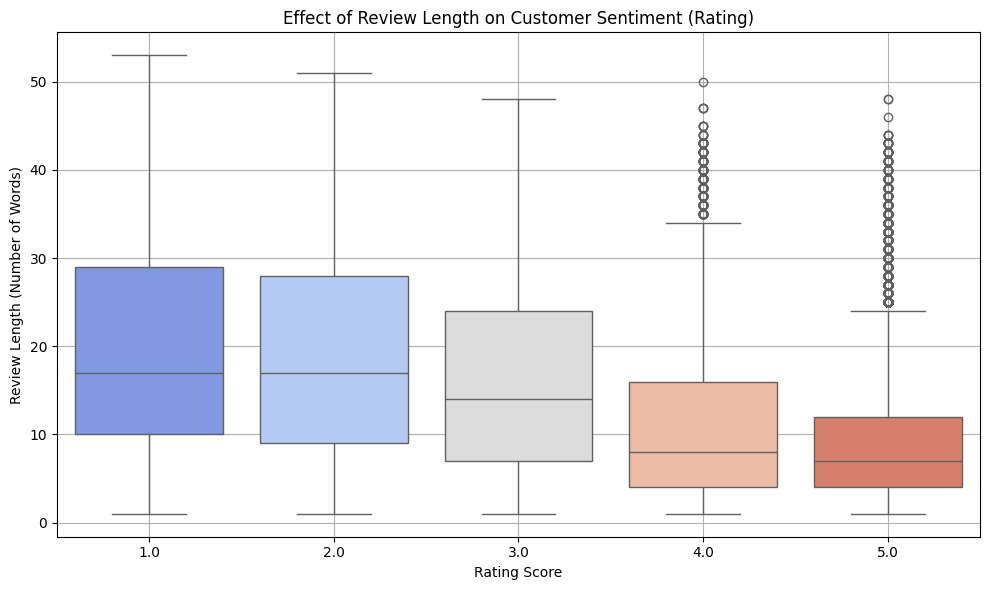

In [7]:
review_col = 'review_comment_message'
rating_col = 'review_score'

df = df.dropna(subset=[review_col, rating_col])

df['review_length'] = df[review_col].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x=rating_col, y='review_length', data=df, palette='coolwarm')
plt.title('Effect of Review Length on Customer Sentiment (Rating)')
plt.xlabel('Rating Score')
plt.ylabel('Review Length (Number of Words)')
plt.grid(True)
plt.tight_layout()
plt.show()


How does the timing of review creation (e.g., delay between purchase and review) influence review scores and customer satisfaction in e-commerce, and what operational changes can mitigate negative impacts of delayed reviews?

<ipython-input-8-2d0ffed813bc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delay_category'] = pd.cut(df['review_delay_days'], bins=bins, labels=labels)
<ipython-input-8-2d0ffed813bc>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='delay_category', y='review_score', data=df, palette='coolwarm', ci=None)
<ipython-input-8-2d0ffed813bc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delay_category', y='review_score', data=df, palette='coolwarm', ci=None)


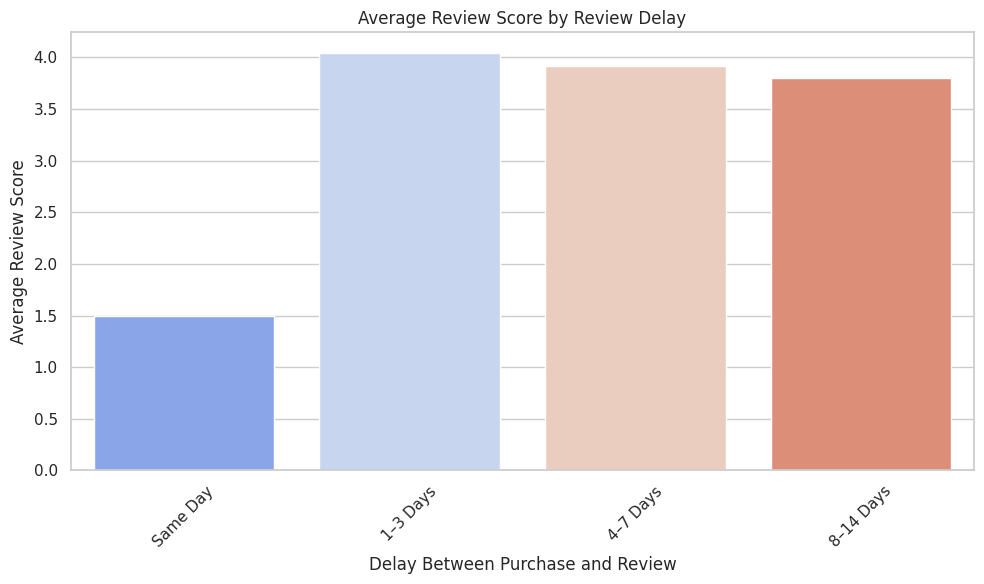

In [8]:
df = df.dropna(subset=['order_purchase_timestamp', 'review_creation_date', 'review_score'])

# Convert timestamps if not already in datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])

# Calculate delay in review
df['review_delay_days'] = (df['review_creation_date'] - df['order_purchase_timestamp']).dt.days

# Remove outliers or negative delays
df = df[df['review_delay_days'] >= 0]

# Categorize delay into bins
bins = [-1, 0, 3, 7, 14]
labels = ['Same Day', '1–3 Days', '4–7 Days', '8–14 Days']
df['delay_category'] = pd.cut(df['review_delay_days'], bins=bins, labels=labels)

# Set up plot style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='delay_category', y='review_score', data=df, palette='coolwarm', ci=None)

# Format plot
plt.title('Average Review Score by Review Delay')
plt.xlabel('Delay Between Purchase and Review')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-32-3895e4e83f12>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_grouped, x='seller_state', y='price', palette='viridis')


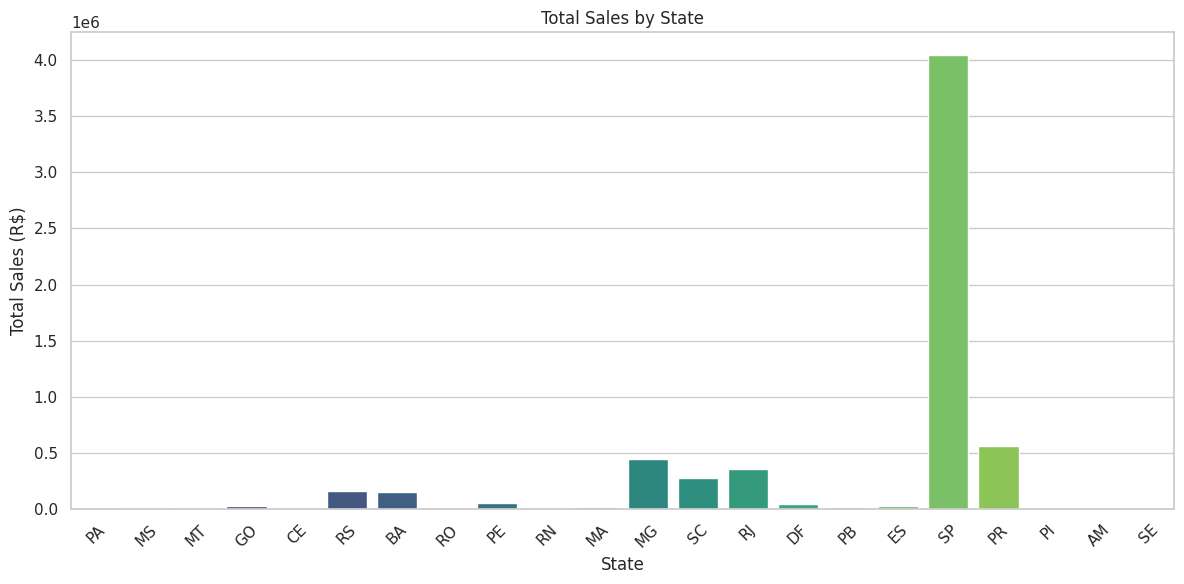

In [32]:
df = df.dropna(subset=['seller_state', 'review_score', 'price'])

# Group by seller state to calculate metrics
state_grouped = df.groupby('seller_state').agg({
    'review_score': 'mean',
    'price': 'sum',
    'Unnamed: 0': 'count'  # proxy for number of orders
}).reset_index().rename(columns={'Unnamed: 0': 'order_count'})

# Sort by review_score for better visualization
state_grouped = state_grouped.sort_values(by='review_score', ascending=False)

# Plot average review score per state
# plt.figure(figsize=(12, 6))
# sns.barplot(data=state_grouped, x='seller_state', y='review_score', palette='coolwarm')
# plt.title('Average Review Score by State')
# plt.xlabel('State')
# plt.ylabel('Average Review Score')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Plot total sales per state
plt.figure(figsize=(12, 6))
sns.barplot(data=state_grouped, x='seller_state', y='price', palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


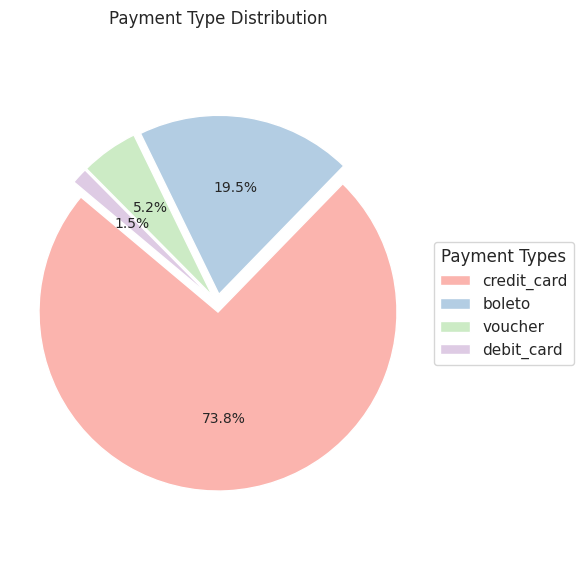

In [35]:
df = df.dropna(subset=['payment_type'])

# Count payment types
payment_counts = df['payment_type'].value_counts()

# Pie chart settings
labels = payment_counts.index
sizes = payment_counts.values
colors = plt.cm.Pastel1.colors
explode = [0.05] * len(labels)  # to slightly separate all wedges

# Plot
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 10}
)

# Add legend
plt.legend(wedges, labels, title="Payment Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Payment Type Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49512 entries, 0 to 119141
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     49512 non-null  int64         
 1   customer_city                  49512 non-null  object        
 2   seller_city                    49512 non-null  object        
 3   seller_state                   49512 non-null  object        
 4   product_category_name_english  48743 non-null  object        
 5   price                          49512 non-null  float64       
 6   payment_value                  49509 non-null  float64       
 7   payment_type                   49509 non-null  object        
 8   order_status                   49512 non-null  object        
 9   order_purchase_timestamp       49512 non-null  datetime64[ns]
 10  order_delivered_customer_date  47933 non-null  object        
 11  review_score       

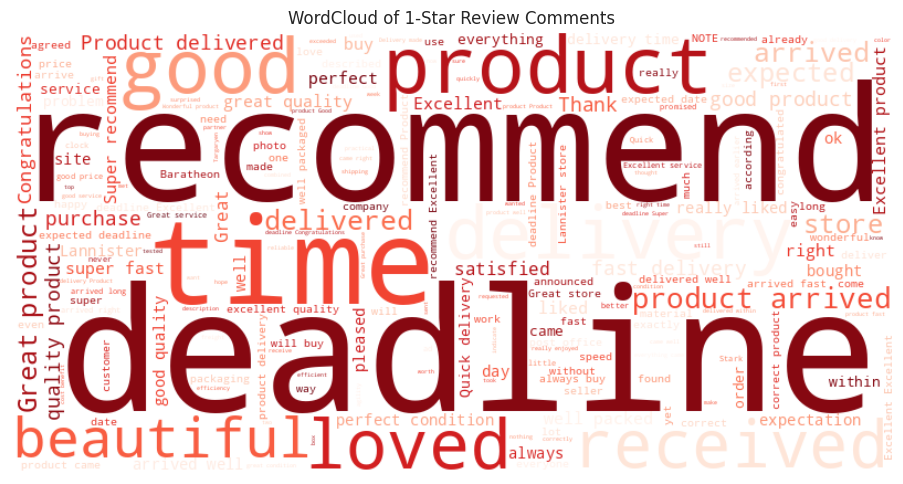

In [43]:
from wordcloud import WordCloud, STOPWORDS

df = df.dropna(subset=['review_score', 'review_comment_message'])

# Filter 1-star reviews
df_1star = df[df['review_score'] == 5]

# Combine all 1-star review messages into one string
text = " ".join(review for review in df_1star['review_comment_message'])

# Optional: add custom stopwords if needed
stopwords = set(STOPWORDS)

# Create the WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='Reds',
    max_words=200
).generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of 1-Star Review Comments")
plt.tight_layout()
plt.show()

<ipython-input-44-441b52e853cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


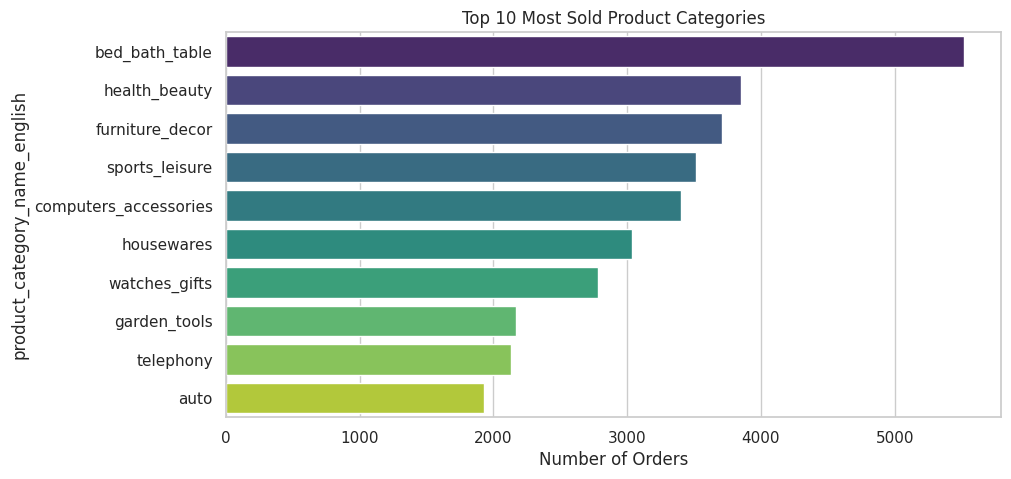

In [44]:
top_categories = df["product_category_name_english"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Most Sold Product Categories")
plt.xlabel("Number of Orders")
plt.show()


<ipython-input-45-6d0c617c9a85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["review_score"].dropna(), palette="magma")


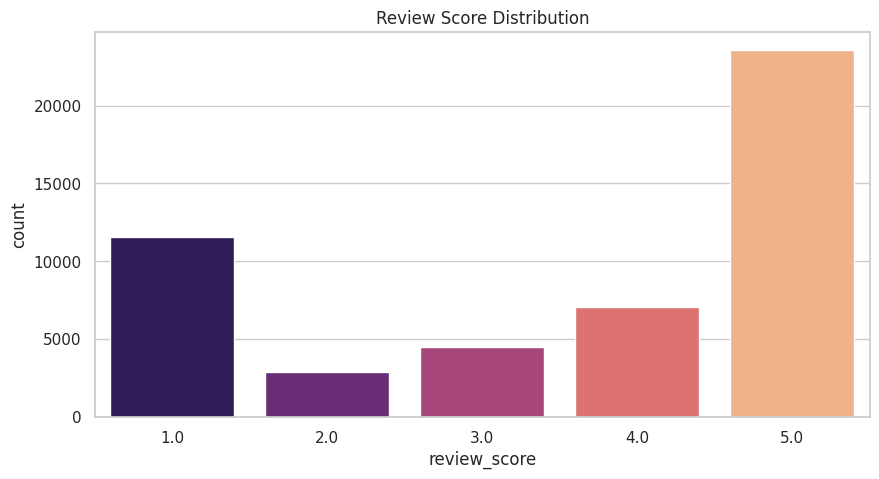

In [45]:

plt.figure(figsize=(10, 5))
sns.countplot(x=df["review_score"].dropna(), palette="magma")
plt.title("Review Score Distribution")
plt.show()